In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
#pandas csv
ablations_df = pd.read_csv('../data/230801_mlp_neuron_ablations.csv')
losses_df = pd.read_csv('../data/prob all 8 layer control-20230718-185339_stats.csv')
losses_df.head()

/tmp/ipykernel_638163/3499442828.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  losses_df = pd.read_csv('../data/prob all 8 layer control-20230718-185339_stats.csv')


,moves played,steps till end state,winner,rotation 1,rotation 2,rotation 3,horizontal flip,vertical flip,training index,train or test,first win condition,second win condition,end move loss
0,"[0, 1, 3, 2, 6]",5,X,399,1439,1040,1114,325,241912,test,left column,NaN,0.000005
1,"[0, 1, 3, 4, 6]",5,X,396,1438,1043,1112,327,190522,train,left column,NaN,0.000114
2,"[0, 1, 3, 5, 6]",5,X,398,1437,1041,1113,326,90275,train,left column,NaN,0.000007
3,"[0, 1, 3, 7, 6]",5,X,395,1436,1044,1110,329,21994,train,left column,NaN,0.000008
4,"[0, 1, 3, 8, 6]",5,X,397,1435,1042,1111,328,48696,train,left column,NaN,0.000013


In [3]:
losses_df = losses_df[['moves played', 'end move loss']]

In [4]:
merged_df = pd.merge(ablations_df, losses_df, on='moves played', how='inner')

In [5]:
merged_df.head()

,moves played,0,1,2,3,4,5,6,7,8,...,504,505,506,507,508,509,510,511,first win condition,end move loss
0,"[0, 1, 3, 2, 6]",0.000008,0.000008,0.000497,0.000010,1.311301e-06,1.097598,0.000004,0.000005,0.000002,...,0.000003,0.000004,0.000002,0.000005,0.000006,0.000008,0.000051,0.000006,left column,0.000005
1,"[0, 1, 3, 4, 6]",0.000195,0.000189,0.036626,0.000232,3.099437e-06,3.076246,0.000077,0.000098,0.000029,...,0.000041,0.000081,0.000042,0.000100,0.000123,0.000181,0.000794,0.000149,left column,0.000114
2,"[0, 1, 3, 5, 6]",0.000011,0.000011,0.000807,0.000013,4.768370e-07,1.423352,0.000005,0.000005,0.000003,...,0.000002,0.000003,0.000003,0.000005,0.000007,0.000010,0.000073,0.000009,left column,0.000007
3,"[0, 1, 3, 7, 6]",0.000015,0.000014,0.002130,0.000017,8.344647e-07,1.009676,0.000005,0.000007,0.000003,...,0.000003,0.000005,0.000004,0.000008,0.000008,0.000012,0.000072,0.000010,left column,0.000008
4,"[0, 1, 3, 8, 6]",0.000022,0.000021,0.001409,0.000025,8.344647e-07,1.193812,0.000010,0.000010,0.000005,...,0.000008,0.000009,0.000005,0.000012,0.000013,0.000019,0.000130,0.000016,left column,0.000013


In [6]:
def add_epsilon(val, column):
    if column in ['moves played', 'first win condition']:
        return val
    return val + 10e-8

merged_df = merged_df.apply(lambda col: col.map(lambda val: add_epsilon(val, col.name)))

merged_df.iloc[-1]

moves played           [8, 7, 6, 5, 4, 3, 1, 2, 0]
0                                              0.0
1                                              0.0
2                                              0.0
3                                              0.0
                                  ...             
509                                            0.0
510                                            0.0
511                                            0.0
first win condition       top left -> bottom right
end move loss                                  0.0
Name: 255167, Length: 515, dtype: object

In [7]:
for col in merged_df.columns:
    if col not in ['moves played', 'end move loss', 'first win condition']:
        merged_df[col] = np.log10(merged_df[col] / merged_df['end move loss'])

normalized_ablation_losses_df = merged_df.drop(columns=['end move loss'])

In [8]:
normalized_ablation_losses_df.head()
#count all nans
normalized_ablation_losses_df.isna().sum().sum()

46080

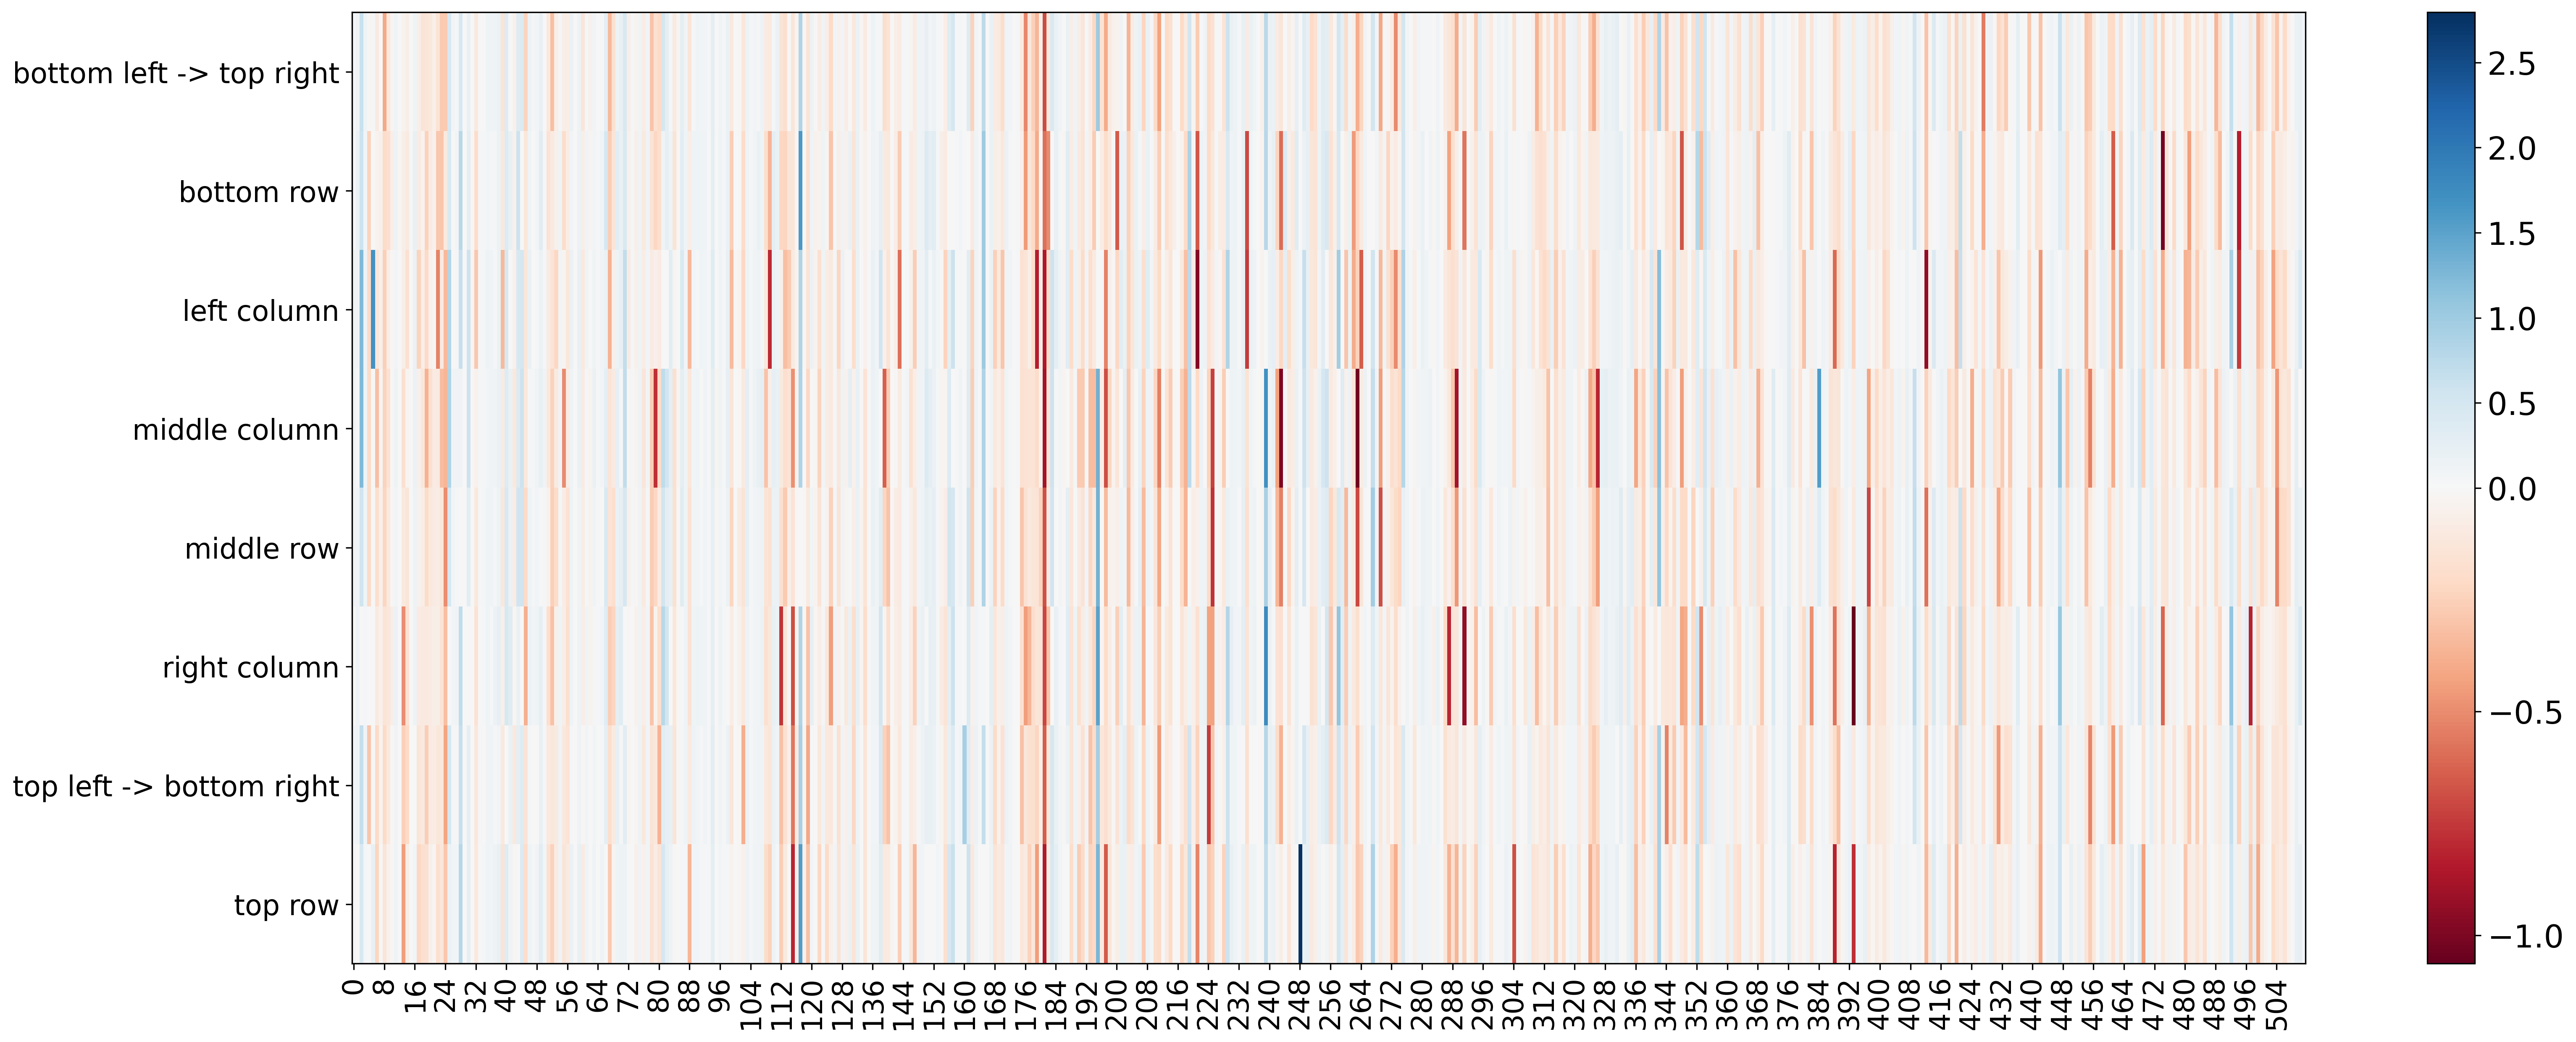

In [34]:
#figure size
plt.rcParams["figure.figsize"] = (25, 10)
plt.rcParams["figure.dpi"] = 300
grouped = normalized_ablation_losses_df.groupby(["first win condition"])
norm = mcolors.TwoSlopeNorm(vcenter=0)
plt.imshow(grouped.mean(), cmap='RdBu', norm=norm, interpolation="nearest",aspect='auto')
plt.colorbar()
# legend
plt.xticks(np.arange(0, 512, 8), labels=grouped.mean().columns[::8]);
# yticks
plt.yticks(np.arange(0, 8), labels=grouped.mean().index);
#y tick size
plt.tick_params(axis='y', which='major', labelsize=16)
#tilt x ticks
plt.xticks(rotation=90);

In [14]:
print(grouped.mean())

                                 0         1             2         3  \
first win condition                                                    
bottom left -> top right  0.091812  0.168158  1.061810e+00  0.197301   
bottom row                0.070424  0.265369  9.779439e-01  0.144174   
left column               0.175735  0.154561  1.940573e+00  0.227697   
middle column             0.153253  0.099531  1.931173e+00  0.181535   
middle row                0.167254  0.177087  9.618193e-01  0.192548   
right column              0.012369  0.159447  4.567718e-09  0.045238   
top left -> bottom right  0.150351  0.162823  1.160219e+00  0.168737   
top row                   0.064346  0.005188  7.432228e-01  0.112108   

                                     4             5         6         7   8  \
first win condition                                                            
bottom left -> top right           NaN  3.796188e-02       NaN -0.013230 NaN   
bottom row               -4.093843e-01 

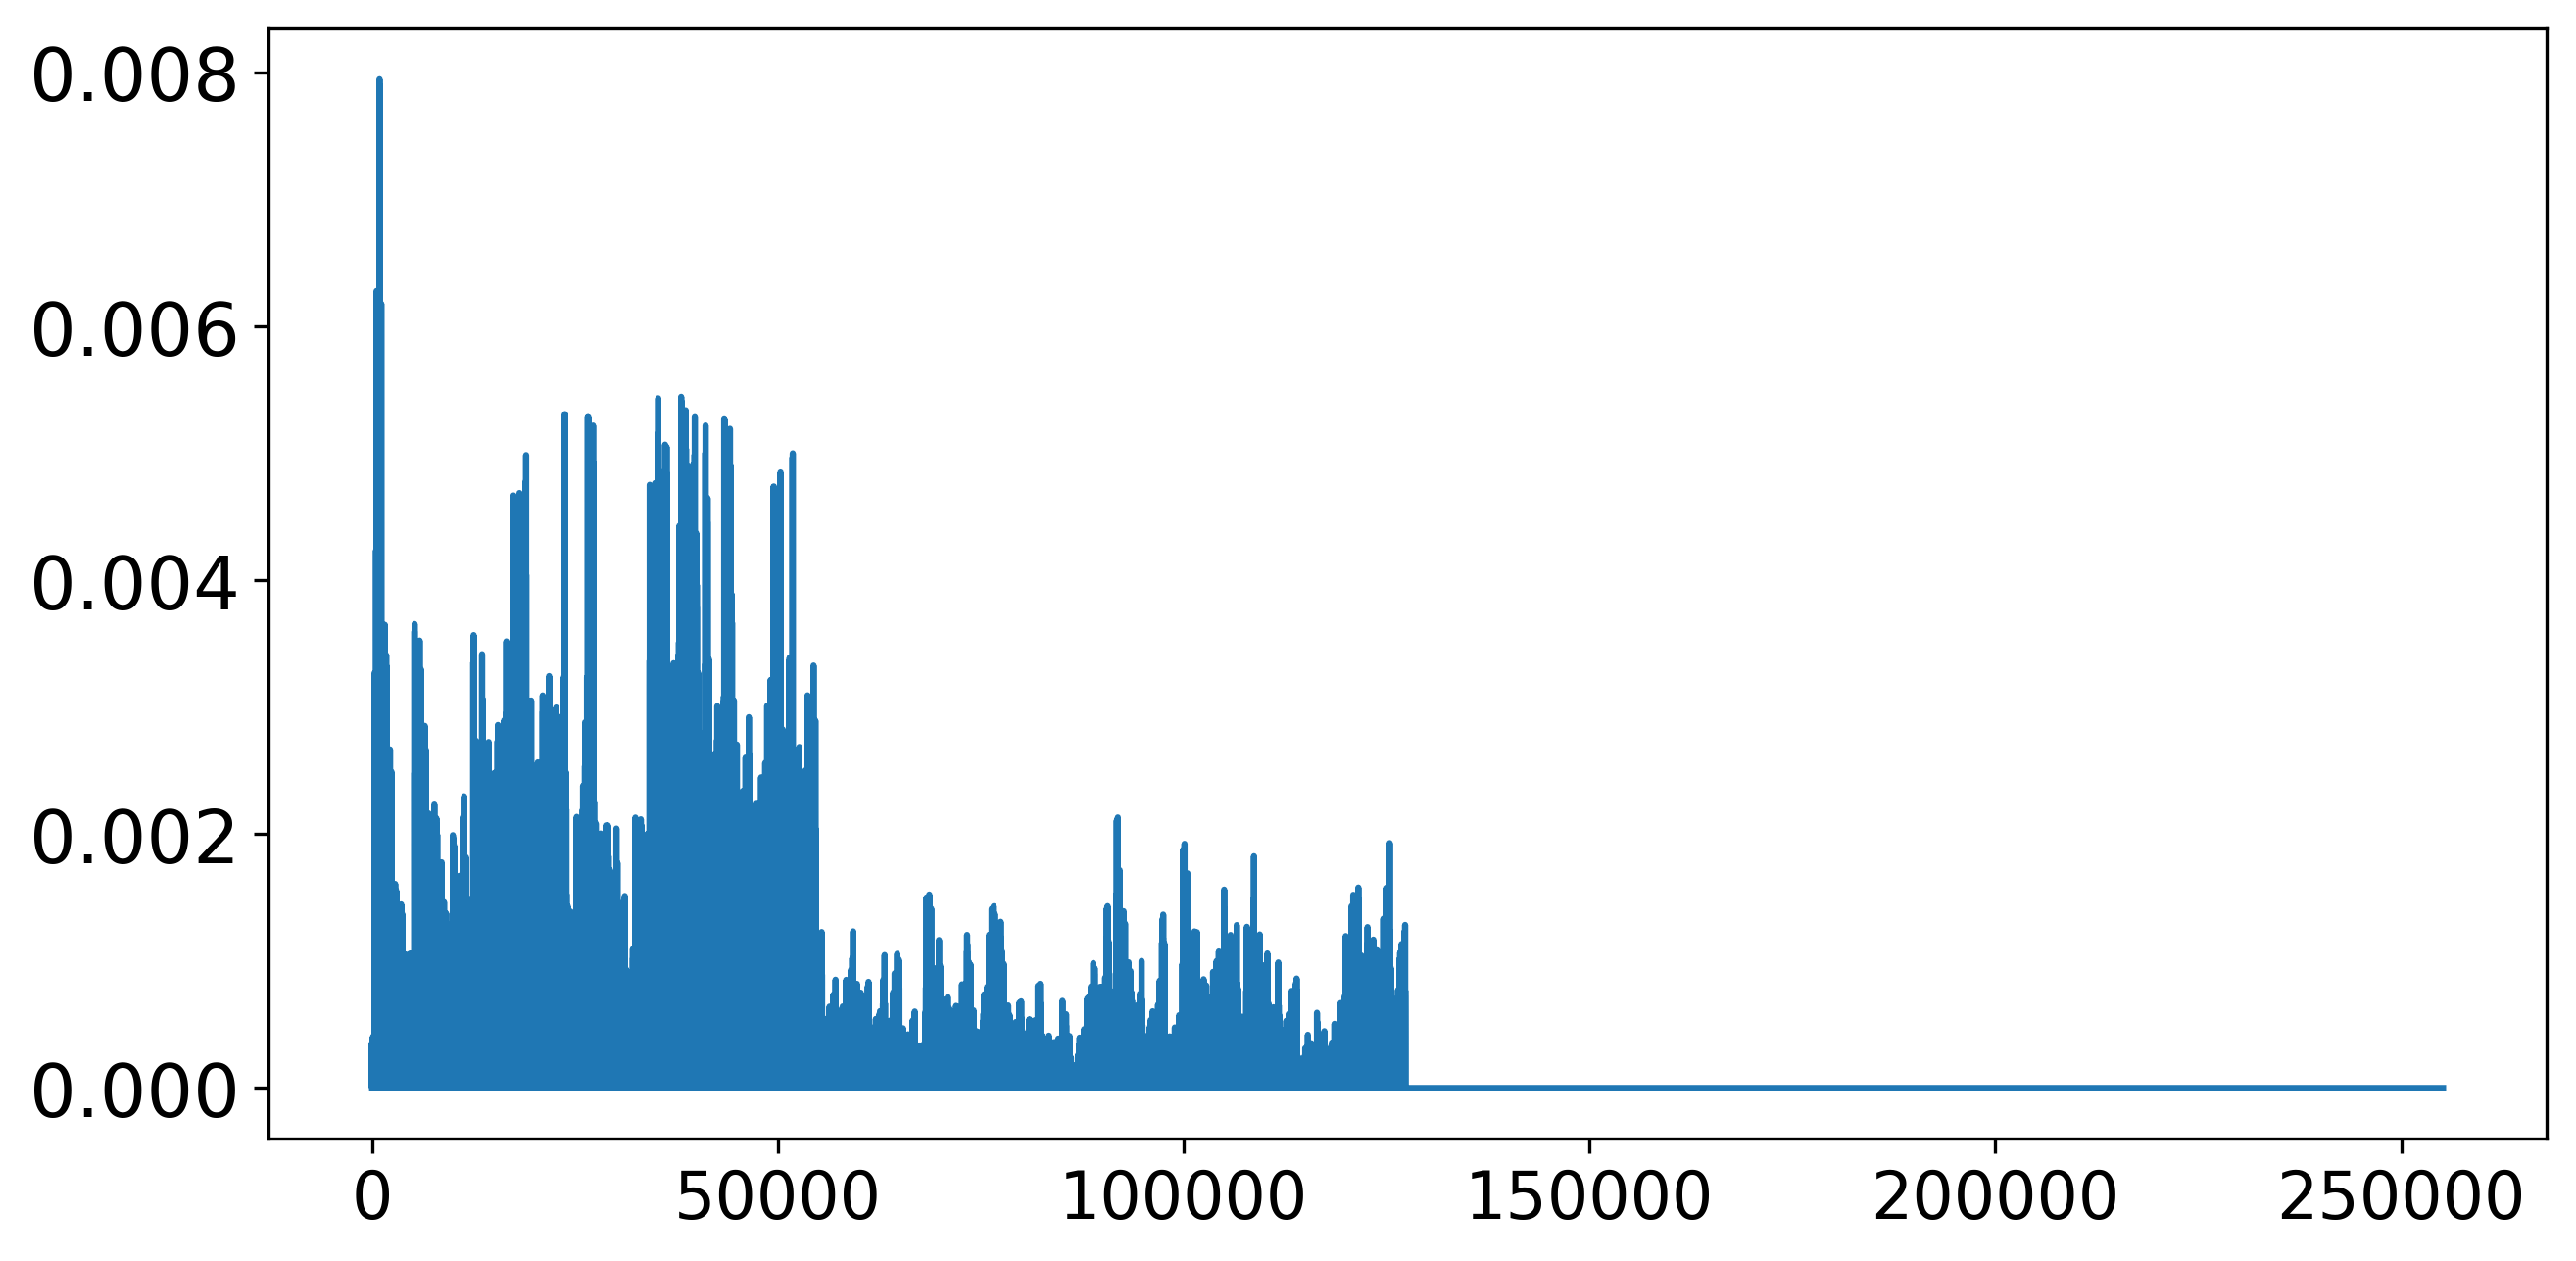

In [36]:
#plot losses_df 'moves played' vs 'end move loss'
plt.figure(figsize=(10,5))
plt.plot(losses_df['end move loss'], label='end move loss')